In [1]:
print("Hola Mundo")

Hola Mundo


In [2]:
from collections import defaultdict, deque

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)

    def add_edge(self, u, v):
        # Para un grafo no dirigido, agregamos aristas en ambas direcciones
        self.graph[u].append(v)
        self.graph[v].append(u)

    def bfs_shortest_path(self, start, end):
        # Verificar si los nodos existen en el grafo
        if start not in self.graph or end not in self.graph:
            return None

        # Cola para BFS
        queue = deque([(start, [start])])
        # Conjunto para marcar nodos visitados
        visited = {start}

        while queue:
            node, path = queue.popleft()

            # Si encontramos el nodo destino
            if node == end:
                return path

            # Explorar todos los vecinos
            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, path + [neighbor]))

        # Si no hay camino
        return None

    def bfs_all_paths(self, start):
        # Diccionario para almacenar la ruta más corta a cada nodo
        paths = {start: [start]}
        # Cola para BFS
        queue = deque([start])
        # Conjunto para marcar nodos visitados
        visited = {start}

        while queue:
            node = queue.popleft()

            # Explorar todos los vecinos
            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    paths[neighbor] = paths[node] + [neighbor]
                    queue.append(neighbor)

        return paths

# Ejemplo de uso
if __name__ == "__main__":
    g = Graph()

    # Agregar aristas según el grafo del documento
    # (Estos son valores de ejemplo, ajústalos según el grafo específico)
    edges = [(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6)]
    for u, v in edges:
        g.add_edge(u, v)

    # Encontrar todas las rutas desde el nodo 0
    all_paths = g.bfs_all_paths(0)
    print("Rutas más cortas desde el nodo 0:")
    for node, path in all_paths.items():
        print(f"Al nodo {node}: {' -> '.join(map(str, path))}")

    # Verificar si existe un camino al nodo X (por ejemplo, nodo 5)
    target = 5
    path = g.bfs_shortest_path(0, target)

    if path:
        print(f"\n¿Existe un path desde 0 al nodo {target}? Sí")
        print(f"Ruta más corta: {' -> '.join(map(str, path))}")
    else:
        print(f"\n¿Existe un path desde 0 al nodo {target}? No")

Rutas más cortas desde el nodo 0:
Al nodo 0: 0
Al nodo 1: 0 -> 1
Al nodo 2: 0 -> 2
Al nodo 3: 0 -> 1 -> 3
Al nodo 4: 0 -> 2 -> 4
Al nodo 5: 0 -> 1 -> 3 -> 5
Al nodo 6: 0 -> 2 -> 4 -> 6

¿Existe un path desde 0 al nodo 5? Sí
Ruta más corta: 0 -> 1 -> 3 -> 5


Creando animación del recorrido BFS...
Animación guardada como bfs_animation.gif


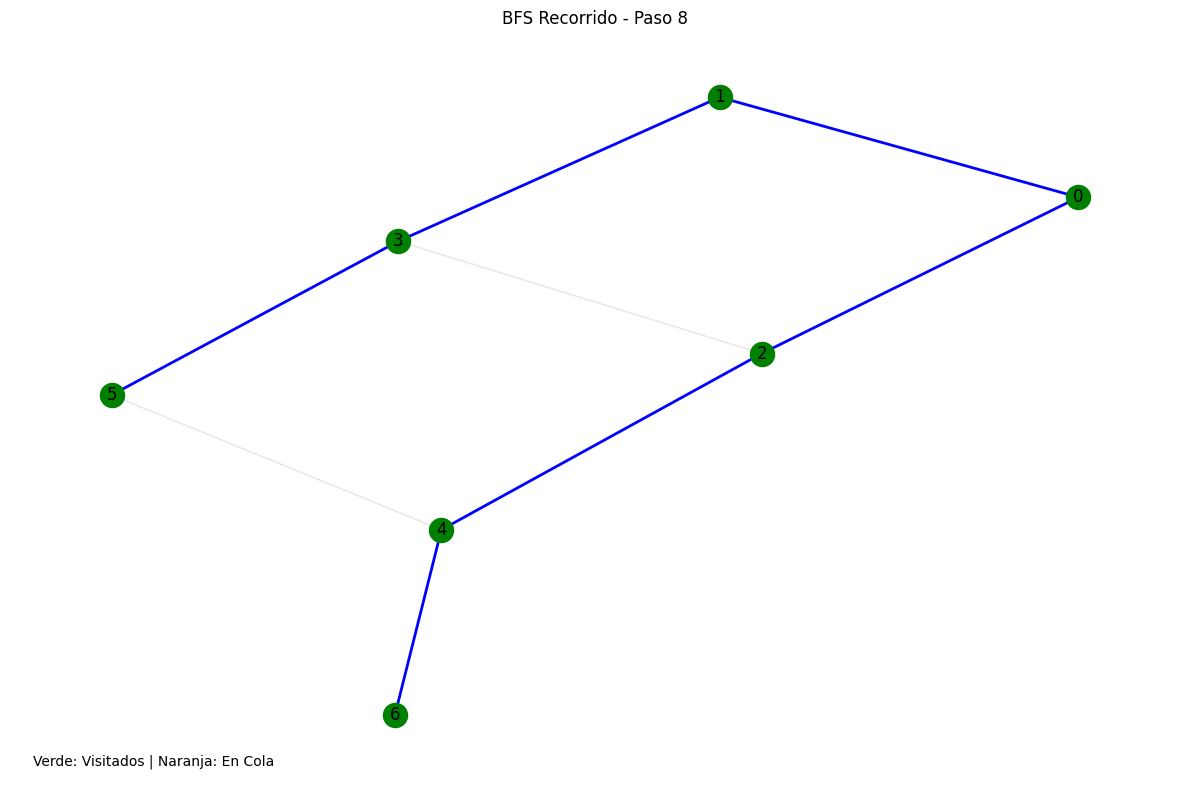


Creando animación del camino más corto al nodo 5...
Animación guardada como bfs_shortest_path_animation.gif


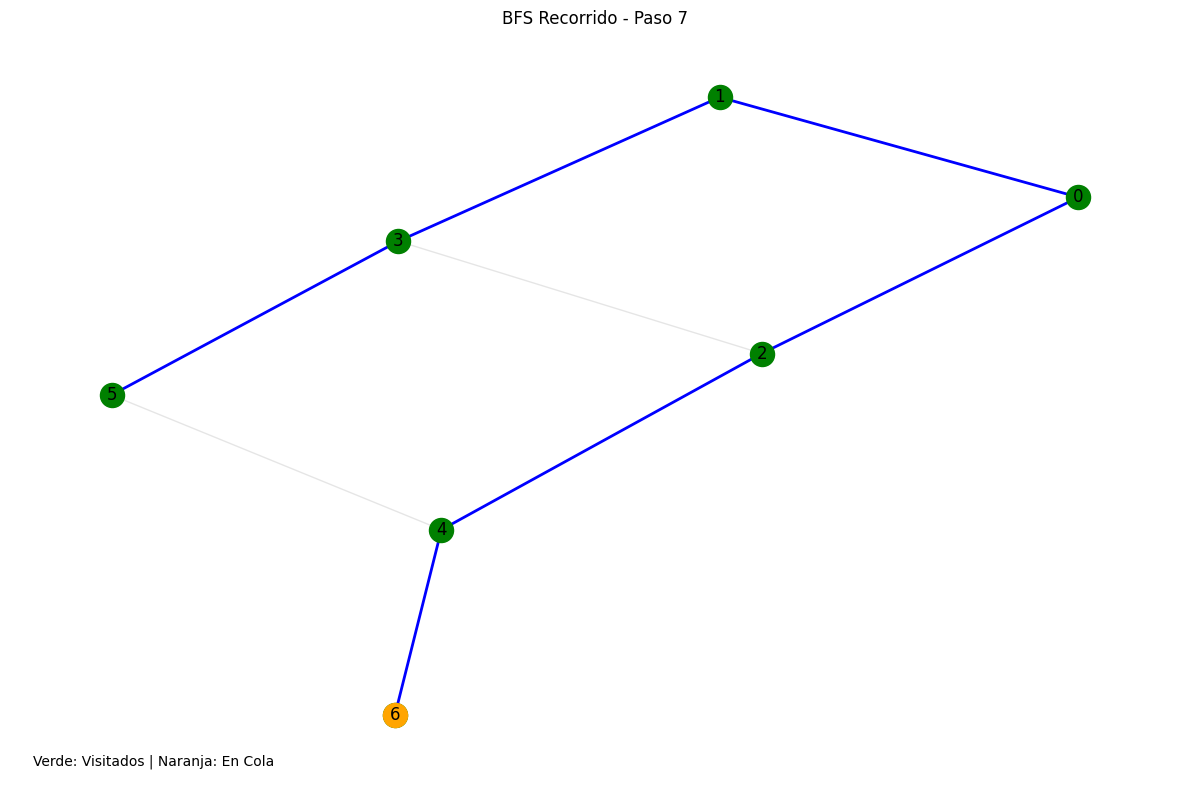


Rutas más cortas desde el nodo 0:
Al nodo 0: 0
Al nodo 1: 0 -> 1
Al nodo 2: 0 -> 2
Al nodo 3: 0 -> 1 -> 3
Al nodo 4: 0 -> 2 -> 4
Al nodo 5: 0 -> 1 -> 3 -> 5
Al nodo 6: 0 -> 2 -> 4 -> 6


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import defaultdict, deque
import time

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
        self.nx_graph = nx.Graph()

    def add_edge(self, u, v):
        # Para un grafo no dirigido
        self.graph[u].append(v)
        self.graph[v].append(u)
        self.nx_graph.add_edge(u, v)

    def bfs_animation(self, start, end=None, filename=None):
        fig, ax = plt.subplots(figsize=(12, 8))
        pos = nx.spring_layout(self.nx_graph, seed=42)  # Posiciones fijas para los nodos

        # Variables para almacenar el estado de la animación
        visited_nodes = []
        queue_history = []
        edges_in_bfs_tree = []
        paths = {start: [start]}
        queue = deque([start])
        visited = {start}

        # Guardar el estado inicial
        visited_nodes.append(list(visited))
        queue_history.append(list(queue))
        edges_in_bfs_tree.append(list())

        # Ejecutar BFS y guardar el estado en cada paso
        while queue:
            node = queue.popleft()

            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    paths[neighbor] = paths[node] + [neighbor]
                    edges_in_bfs_tree[-1].append((node, neighbor))  # Agregar arista al BFS tree

            # Guardar estado después de procesar este nodo
            visited_nodes.append(list(visited))
            queue_history.append(list(queue))

            if len(edges_in_bfs_tree) > 0:
                edges_in_bfs_tree.append(list(edges_in_bfs_tree[-1]))  # Copiar el estado anterior

            # Si estamos buscando un nodo específico y lo encontramos
            if end and node == end:
                break

        # Función para actualizar la animación
        def update(frame):
            ax.clear()

            # Dibujar todas las aristas del grafo como líneas grises
            nx.draw_networkx_edges(self.nx_graph, pos, alpha=0.2, edge_color='grey', ax=ax)

            # Dibujar las aristas del BFS tree
            if frame < len(edges_in_bfs_tree):
                bfs_edges = edges_in_bfs_tree[frame]
                nx.draw_networkx_edges(
                    self.nx_graph, pos,
                    edgelist=bfs_edges,
                    edge_color='blue',
                    width=2.0,
                    ax=ax
                )

            # Dibujar nodos no visitados en gris
            all_nodes = list(self.nx_graph.nodes())
            if frame < len(visited_nodes):
                not_visited = [node for node in all_nodes if node not in visited_nodes[frame]]
                nx.draw_networkx_nodes(
                    self.nx_graph, pos,
                    nodelist=not_visited,
                    node_color='lightgrey',
                    ax=ax
                )

            # Dibujar nodos visitados en verde
            if frame < len(visited_nodes):
                nx.draw_networkx_nodes(
                    self.nx_graph, pos,
                    nodelist=visited_nodes[frame],
                    node_color='green',
                    ax=ax
                )

            # Dibujar nodos en la cola en naranja
            if frame < len(queue_history):
                nx.draw_networkx_nodes(
                    self.nx_graph, pos,
                    nodelist=queue_history[frame],
                    node_color='orange',
                    ax=ax
                )

            # Dibujar etiquetas para todos los nodos
            nx.draw_networkx_labels(self.nx_graph, pos, ax=ax)

            # Agregar leyenda y título
            ax.set_title(f"BFS Recorrido - Paso {frame+1}")
            ax.text(0.02, 0.02, "Verde: Visitados | Naranja: En Cola", transform=ax.transAxes)
            ax.axis('off')

        # Crear la animación
        frames = max(len(visited_nodes), len(edges_in_bfs_tree))
        ani = FuncAnimation(fig, update, frames=frames, interval=1000, repeat=False)

        # Guardar animación o mostrarla
        if filename:
            ani.save(filename, writer='pillow', fps=1)
            print(f"Animación guardada como {filename}")

        plt.tight_layout()
        plt.show()

        return paths

    def bfs_shortest_path(self, start, end):
        # Mismo código del método original
        if start not in self.graph or end not in self.graph:
            return None

        queue = deque([(start, [start])])
        visited = {start}

        while queue:
            node, path = queue.popleft()

            if node == end:
                return path

            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, path + [neighbor]))

        return None

    def bfs_all_paths(self, start):
        # Mismo código del método original
        paths = {start: [start]}
        queue = deque([start])
        visited = {start}

        while queue:
            node = queue.popleft()

            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    paths[neighbor] = paths[node] + [neighbor]
                    queue.append(neighbor)

        return paths

# Ejemplo de uso mejorado
if __name__ == "__main__":
    g = Graph()

    # Agregar aristas según el grafo
    edges = [(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6)]
    for u, v in edges:
        g.add_edge(u, v)

    # Crear animación de BFS desde el nodo 0
    print("Creando animación del recorrido BFS...")
    all_paths = g.bfs_animation(0, filename="bfs_animation.gif")

    # También podemos encontrar y animar el camino a un nodo específico
    print("\nCreando animación del camino más corto al nodo 5...")
    g.bfs_animation(0, 5, filename="bfs_shortest_path_animation.gif")

    # Mostrar información sobre los caminos
    print("\nRutas más cortas desde el nodo 0:")
    for node, path in all_paths.items():
        print(f"Al nodo {node}: {' -> '.join(map(str, path))}")

In [7]:
from IPython.display import HTML
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import defaultdict, deque
import time

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
        self.nx_graph = nx.Graph()

    def add_edge(self, u, v):
        # Para un grafo no dirigido
        self.graph[u].append(v)
        self.graph[v].append(u)
        self.nx_graph.add_edge(u, v)

    def bfs_animation(self, start, end=None):
        fig, ax = plt.subplots(figsize=(12, 8))
        pos = nx.spring_layout(self.nx_graph, seed=42)  # Posiciones fijas para los nodos

        # Variables para almacenar el estado de la animación
        visited_nodes = []
        queue_history = []
        edges_in_bfs_tree = []
        paths = {start: [start]}
        queue = deque([start])
        visited = {start}

        # Guardar el estado inicial
        visited_nodes.append(list(visited))
        queue_history.append(list(queue))
        edges_in_bfs_tree.append(list())

        # Ejecutar BFS y guardar el estado en cada paso
        while queue:
            node = queue.popleft()

            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    paths[neighbor] = paths[node] + [neighbor]
                    edges_in_bfs_tree[-1].append((node, neighbor))  # Agregar arista al BFS tree

            # Guardar estado después de procesar este nodo
            visited_nodes.append(list(visited))
            queue_history.append(list(queue))

            if len(edges_in_bfs_tree) > 0:
                edges_in_bfs_tree.append(list(edges_in_bfs_tree[-1]))  # Copiar el estado anterior

            # Si estamos buscando un nodo específico y lo encontramos
            if end and node == end:
                break

        # Función para actualizar la animación
        def update(frame):
            ax.clear()

            # Dibujar todas las aristas del grafo como líneas grises
            nx.draw_networkx_edges(self.nx_graph, pos, alpha=0.2, edge_color='grey', ax=ax)

            # Dibujar las aristas del BFS tree
            if frame < len(edges_in_bfs_tree):
                bfs_edges = edges_in_bfs_tree[frame]
                nx.draw_networkx_edges(
                    self.nx_graph, pos,
                    edgelist=bfs_edges,
                    edge_color='blue',
                    width=2.0,
                    ax=ax
                )

            # Dibujar nodos no visitados en gris
            all_nodes = list(self.nx_graph.nodes())
            if frame < len(visited_nodes):
                not_visited = [node for node in all_nodes if node not in visited_nodes[frame]]
                nx.draw_networkx_nodes(
                    self.nx_graph, pos,
                    nodelist=not_visited,
                    node_color='lightgrey',
                    ax=ax
                )

            # Dibujar nodos visitados en verde
            if frame < len(visited_nodes):
                nx.draw_networkx_nodes(
                    self.nx_graph, pos,
                    nodelist=visited_nodes[frame],
                    node_color='green',
                    ax=ax
                )

            # Dibujar nodos en la cola en naranja
            if frame < len(queue_history):
                nx.draw_networkx_nodes(
                    self.nx_graph, pos,
                    nodelist=queue_history[frame],
                    node_color='orange',
                    ax=ax
                )

            # Dibujar etiquetas para todos los nodos
            nx.draw_networkx_labels(self.nx_graph, pos, ax=ax)

            # Agregar leyenda y título
            ax.set_title(f"BFS Recorrido - Paso {frame+1}")
            ax.text(0.02, 0.02, "Verde: Visitados | Naranja: En Cola | Azul: Árbol BFS", transform=ax.transAxes)
            ax.axis('off')

        # Crear la animación
        frames = max(len(visited_nodes), len(edges_in_bfs_tree))
        ani = FuncAnimation(fig, update, frames=frames, interval=1000, repeat=True)

        plt.close(fig)  # Evita que se muestre la figura estática

        # Devolver el HTML para mostrar la animación en el notebook
        return HTML(ani.to_jshtml())

    def bfs_shortest_path(self, start, end):
        # Verificar si los nodos existen en el grafo
        if start not in self.graph or end not in self.graph:
            return None

        queue = deque([(start, [start])])
        visited = {start}

        while queue:
            node, path = queue.popleft()

            if node == end:
                return path

            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, path + [neighbor]))

        return None

    def bfs_all_paths(self, start):
        paths = {start: [start]}
        queue = deque([start])
        visited = {start}

        while queue:
            node = queue.popleft()

            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    paths[neighbor] = paths[node] + [neighbor]
                    queue.append(neighbor)

        return paths

In [8]:
# Ejemplo de uso en el notebook
g = Graph()

# Agregar aristas según el grafo
edges = [(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6)]
for u, v in edges:
    g.add_edge(u, v)

# Mostrar animación del recorrido BFS completo
print("Animación del recorrido BFS completo:")
display(g.bfs_animation(0))

# Mostrar animación del camino más corto a un nodo específico
print("Animación del camino más corto al nodo 5:")
display(g.bfs_animation(0, 5))


Animación del recorrido BFS completo:


Animación del camino más corto al nodo 5:


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from collections import deque

class BFSVisualizer:
    def __init__(self):
        self.G = nx.Graph()
        # Creamos el grafo según la imagen
        edges = [(0, 1), (0, 2), (0, 5), (1, 0), (1, 2), (2, 0), (2, 1), (2, 3), (2, 4),
                (3, 2), (3, 4), (3, 5), (4, 2), (4, 3), (5, 0), (5, 3)]
        self.G.add_edges_from(edges)

        # Lista de adyacencia según la imagen
        self.adj = {
            0: [2, 1, 5],
            1: [0, 2],
            2: [0, 1, 3, 4],
            3: [5, 4, 2],
            4: [3, 2],
            5: [3, 0]
        }

        # Inicialización
        self.n = self.G.number_of_nodes()
        self.marked = [False] * self.n
        self.edgeTo = [None] * self.n
        self.colors = ['lightgray'] * self.n
        self.edge_colors = {}
        for u, v in self.G.edges():
            self.edge_colors[(u, v)] = 'gray'
            self.edge_colors[(v, u)] = 'gray'

        # Datos para la animación
        self.states = []
        self.queue_states = []
        self.marked_states = []
        self.edgeTo_states = []

    def bfs(self, start):
        queue = deque([start])
        self.marked[start] = True
        self.colors[start] = 'green'

        # Guardar estado inicial
        self.states.append({
            'node_colors': self.colors.copy(),
            'edge_colors': self.edge_colors.copy()
        })
        self.queue_states.append(list(queue))
        self.marked_states.append(self.marked.copy())
        self.edgeTo_states.append(self.edgeTo.copy())

        while queue:
            v = queue.popleft()

            for w in self.adj[v]:
                if not self.marked[w]:
                    self.edgeTo[w] = v
                    self.marked[w] = True
                    queue.append(w)
                    self.colors[w] = 'green'
                    self.edge_colors[(v, w)] = 'red'
                    self.edge_colors[(w, v)] = 'red'

                    # Guardar el estado después de cada paso
                    self.states.append({
                        'node_colors': self.colors.copy(),
                        'edge_colors': self.edge_colors.copy()
                    })
                    self.queue_states.append(list(queue))
                    self.marked_states.append(self.marked.copy())
                    self.edgeTo_states.append(self.edgeTo.copy())

            # Cambiar el color del nodo procesado a negro
            self.colors[v] = 'black'

            # Guardar estado después de terminar con un nodo
            self.states.append({
                'node_colors': self.colors.copy(),
                'edge_colors': self.edge_colors.copy()
            })
            self.queue_states.append(list(queue))
            self.marked_states.append(self.marked.copy())
            self.edgeTo_states.append(self.edgeTo.copy())

    def create_animation(self):
        fig, axes = plt.subplots(1, 2, figsize=(15, 8))
        ax1, ax2 = axes

        # Posiciones de los nodos según la imagen
        pos = {
            0: (1, 3),
            1: (1, 2),
            2: (3, 3),
            3: (2, 1),
            4: (3, 1),
            5: (0, 1)
        }

        def update(frame):
            ax1.clear()
            ax2.clear()

            state = self.states[frame]
            queue = self.queue_states[frame]
            marked = self.marked_states[frame]
            edgeTo = self.edgeTo_states[frame]

            # Dibujar el grafo con los colores del estado actual
            nx.draw_networkx_nodes(self.G, pos, ax=ax1, node_color=[state['node_colors'][i] for i in self.G.nodes()])
            for (u, v) in self.G.edges():
                color = state['edge_colors'].get((u, v), 'gray')
                if color == 'red':  # Si es una arista activa del BFS
                    nx.draw_networkx_edges(self.G, pos, ax=ax1, edgelist=[(u, v)], edge_color=color, width=2.5)
                else:
                    nx.draw_networkx_edges(self.G, pos, ax=ax1, edgelist=[(u, v)], edge_color=color, width=1, alpha=0.5)

            nx.draw_networkx_labels(self.G, pos, ax=ax1)
            ax1.set_title("BFS Traversal")
            ax1.axis('off')

            # Tabla de datos en el lado derecho
            ax2.axis('off')
            ax2.set_title("BFS Data Structures")

            # Cola
            queue_text = "queue: " + str(queue)

            # marked[]
            marked_text = "marked[]:\n"
            for i in range(len(marked)):
                mark = "T" if marked[i] else "F"
                marked_text += f"{i}: {mark}\n"

            # edgeTo[]
            edgeTo_text = "edgeTo[]:\n"
            for i in range(len(edgeTo)):
                edge = edgeTo[i] if edgeTo[i] is not None else "-"
                edgeTo_text += f"{i}: {edge}\n"

            # adj[]
            adj_text = "adj[]:\n"
            for i in range(len(self.adj)):
                adj_text += f"{i}: {self.adj[i]}\n"

            # Mostrar los textos
            ax2.text(0.0, 0.9, queue_text, fontsize=10)
            ax2.text(0.0, 0.7, marked_text, fontsize=10)
            ax2.text(0.3, 0.7, edgeTo_text, fontsize=10)
            ax2.text(0.6, 0.7, adj_text, fontsize=10)

            # Añadir una leyenda para explicar los colores
            legend_text = "Colores:\n" + \
                         "Verde: Nodo en la cola\n" + \
                         "Negro: Nodo procesado\n" + \
                         "Gris: Nodo no visitado\n" + \
                         "Rojo: Aristas del árbol BFS"
            ax2.text(0.0, 0.0, legend_text, fontsize=10)

        anim = FuncAnimation(fig, update, frames=len(self.states), interval=1500, repeat=True)
        plt.close()  # Evita que se muestre la figura estática
        return HTML(anim.to_jshtml())

# Ejemplo de uso:
bfs_vis = BFSVisualizer()
bfs_vis.bfs(0)  # Iniciar BFS desde el nodo 0
animation = bfs_vis.create_animation()
animation  # Mostrar la animación